In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import torch
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils 

from classes.data_loader import split_dataloader
from classes.Models import test_model, train_model

#ignore warnings
import warnings 
warnings.filterwarnings("ignore")

plt.ion()

In [2]:
# load the dataset object with dataloader
loader = split_dataloader("attribute_list.csv","hair_color")

In [3]:
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 36, 5, padding=2)
        self.conv2 = nn.Conv2d(36, 64, 5, padding=2)
        self.conv3 = nn.Conv2d(64, 128, 5, padding=2)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128*28*28, 500)
        self.fc2 = nn.Linear(500, 6)
        
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flatten image input
        x = x.view(-1, 128*28*28)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 36, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(36, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=6, bias=True)
  (dropout): Dropout(p=0.1)
)


In [5]:
# train the model 
z = train_model(loader['train'],loader['val'],model,n_epochs=100,save_file='model')

using gpu
Epoch: 1 	Train Loss: 1.522455 	Val Loss: 1.522451
Validation Accuracy: 32.13828425096031 %
Time taken: 11.973580121994019
Saving model ...

Epoch: 2 	Train Loss: 1.369053 	Val Loss: 1.337908
Validation Accuracy: 41.48527528809219 %
Time taken: 11.906239032745361
Saving model ...

Epoch: 3 	Train Loss: 1.252626 	Val Loss: 1.089491
Validation Accuracy: 53.137003841229195 %
Time taken: 12.01923394203186
Saving model ...

Epoch: 4 	Train Loss: 1.067402 	Val Loss: 1.071453
Validation Accuracy: 63.76440460947503 %
Time taken: 11.931457042694092
Saving model ...

Epoch: 5 	Train Loss: 0.926191 	Val Loss: 0.770857
Validation Accuracy: 71.44686299615877 %
Time taken: 11.875969171524048
Saving model ...

Epoch: 6 	Train Loss: 0.821040 	Val Loss: 0.770002
Validation Accuracy: 67.73367477592829 %
Time taken: 11.740132093429565
Saving model ...

Epoch: 7 	Train Loss: 0.727151 	Val Loss: 0.620042
Validation Accuracy: 78.10499359795135 %
Time taken: 11.936222791671753
Saving model ...

Epo

Validation Accuracy: 85.91549295774648 %
Time taken: 11.582756757736206

Epoch: 65 	Train Loss: 0.139367 	Val Loss: 0.374156
Validation Accuracy: 87.32394366197182 %
Time taken: 11.60869812965393

Epoch: 66 	Train Loss: 0.126359 	Val Loss: 0.367168
Validation Accuracy: 87.19590268886043 %
Time taken: 11.512188196182251

Epoch: 67 	Train Loss: 0.154712 	Val Loss: 0.522617
Validation Accuracy: 86.29961587708067 %
Time taken: 11.627730131149292

Epoch: 68 	Train Loss: 0.122649 	Val Loss: 0.441974
Validation Accuracy: 86.55569782330346 %
Time taken: 11.542380094528198

Epoch: 69 	Train Loss: 0.120604 	Val Loss: 0.332622
Validation Accuracy: 87.45198463508322 %
Time taken: 11.59940791130066
Saving model ...

Epoch: 70 	Train Loss: 0.130238 	Val Loss: 0.344707
Validation Accuracy: 86.68373879641486 %
Time taken: 11.923511028289795

Epoch: 71 	Train Loss: 0.110513 	Val Loss: 0.344231
Validation Accuracy: 87.58002560819462 %
Time taken: 12.003054857254028

Epoch: 72 	Train Loss: 0.148310 	Val 

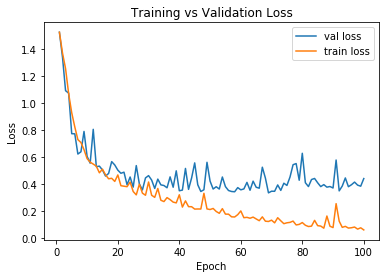

In [9]:
# display learning graph of training and validation loss
ep = [i for i in range(1,len(z['accuracy'])+1)]
plt.plot(ep,z['val_loss'])
plt.plot(ep,z['train_loss'])

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['val loss','train loss'])


89.75672215108835


Text(0, 0.5, 'Accuracy')

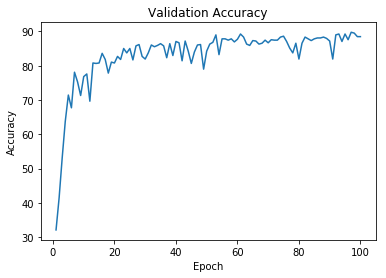

In [10]:
# display learning graph of accuracy 
print(max(z['accuracy']))
plt.plot(ep,z['accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [8]:
# load saved weights
model.load_state_dict(torch.load('savedmodels/model.pt'))
# run test dataset
load = test_model(loader['test'],model)

using gpu
Test Accuracy: 89.24455825864277 %
